## Data Profiling

Gathering descriptive statistics can be a tedious process. Gladly, there are libraries that exist that perform all of the data crunching for you. They output a very clear profile of your data. *pandas-profiling* is one of them. That library offers out-of-the-box statistical profiling of your dataset. Since the dataset we are using is tidy and standardized, we can use the library right away on our dataset.

We will use a dataset of Craft Beers from the CraftCans website. This dataset only contains data from canned beers from breweries in the United States. It’s not clear from the website if this dataset reports every single canned beer brewed in the US or not. To be safe, you will consider this dataset to be a sample that may contain biases.

In [1]:
import pandas as pd

In [2]:
beers = pd.read_csv("data/beers.csv")

breweries = pd.read_csv("data/breweries.csv")

beers_and_breweries = pd.merge(beers, 
                               breweries, 
                               how = 'inner', 
                               left_on="brewery_id", 
                               right_on="brewery_id", 
                               sort= True, 
                               suffixes=('_beer', '_brewery'))

beers_and_breweries.head()

,tid,abv,ibu,id,name_beer,style,brewery_id,ounces,name_brewery,city,state
0,1493,0.045,50.0,2692,Get Together,American IPA,0,16.0,NorthGate Brewing,Minneapolis,MN
1,1494,0.049,26.0,2691,Maggie's Leap,Milk / Sweet Stout,0,16.0,NorthGate Brewing,Minneapolis,MN
2,1495,0.048,19.0,2690,Wall's End,English Brown Ale,0,16.0,NorthGate Brewing,Minneapolis,MN
3,1496,0.060,38.0,2689,Pumpion,Pumpkin Ale,0,16.0,NorthGate Brewing,Minneapolis,MN
4,1497,0.060,25.0,2688,Stronghold,American Porter,0,16.0,NorthGate Brewing,Minneapolis,MN


In [3]:
beers_and_breweries.dtypes

tid               int64
abv             float64
ibu             float64
id                int64
name_beer        object
style            object
brewery_id        int64
ounces          float64
name_brewery     object
city             object
state            object
dtype: object

In [4]:
# because we had a problem to import seaborn here is the solution from SO
#https://stackoverflow.com/questions/34973997/python-cant-import-seaborn

import sys
sys.path.append("/usr/local/lib/python2.7/site-packages")
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

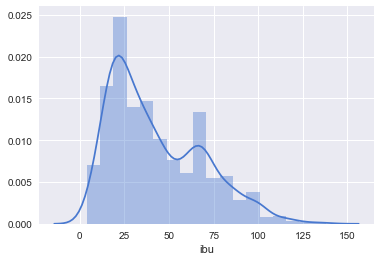

In [5]:
%matplotlib inline

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(beers_and_breweries["ibu"].dropna());


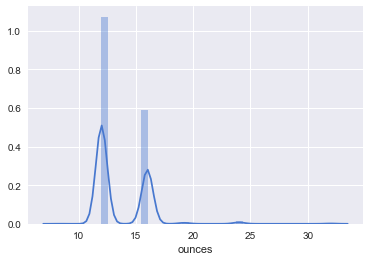

In [6]:
sns.distplot(beers_and_breweries["ounces"].dropna());

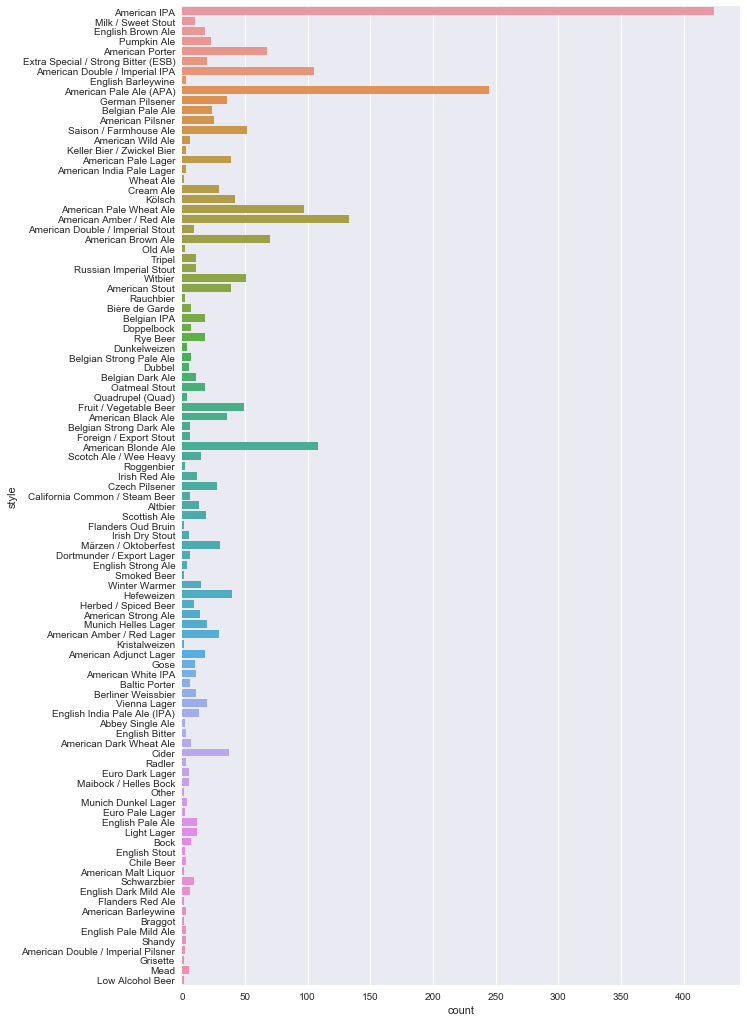

In [7]:
plt.subplots(figsize=(10, 18))
sns.countplot(y=beers_and_breweries["style"]);

In [8]:
beers_and_breweries[["style", "name_beer"]].describe()

,style,name_beer
count,2405,2410
unique,99,2305
top,American IPA,Nonstop Hef Hop
freq,424,12


In [11]:
import pandas_profiling as pf

In [12]:
pf.ProfileReport(beers_and_breweries)

Number of variables,11
Number of observations,2410
Total Missing (%),4.0%
Total size in memory,305.9 KiB
Average record size in memory,130.0 B
Numeric,6
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [13]:
report = pf.ProfileReport(beers_and_breweries)

In [14]:
description = report.get_description()
description

{'correlations': {'pearson':                  tid       abv       ibu        id  brewery_id    ounces
  tid         1.000000  0.006547  0.019885 -0.077488   -0.012088  0.037981
  abv         0.006547  1.000000  0.670621  0.042811   -0.098632  0.172529
  ibu         0.019885  0.670621  1.000000  0.000485   -0.004875  0.054691
  id         -0.077488  0.042811  0.000485  1.000000   -0.504030  0.100843
  brewery_id -0.012088 -0.098632 -0.004875 -0.504030    1.000000 -0.133762
  ounces      0.037981  0.172529  0.054691  0.100843   -0.133762  1.000000,
  'spearman':                  tid       abv       ibu        id  brewery_id    ounces
  tid         1.000000 -0.007037  0.008871 -0.078567   -0.006594  0.026093
  abv        -0.007037  1.000000  0.667780  0.041962   -0.097120  0.173042
  ibu         0.008871  0.667780  1.000000  0.003784    0.008311  0.054958
  id         -0.078567  0.041962  0.003784  1.000000   -0.506097  0.089073
  brewery_id -0.006594 -0.097120  0.008311 -0.506097    1.00